In [161]:
# Attaching google drive

from google.colab import drive
drive.mount('/content/drive/')

import os
os.chdir('/content/drive/My Drive/Colab Notebooks/refine-epitope-hmm/src')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [162]:
!pip install pomegranate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [163]:
import numpy as np
import pandas as pd
#import pomegranate as pg
import matplotlib.pyplot as plt


# Importing dataset to select exact epitopes and non-epitope

In [164]:
import pandas as pd 

ov_newdata = pd.read_csv('../input/Ov_newdata.csv')

In [165]:
list_exact = []
sequence=""
tipo=''
for index, row in ov_newdata.iterrows():
    if row['Info_type'] != 'NA':
      if row['Info_type']=='Exact Epitope':
        tipo = 'exact'
        sequence = sequence + row['Info_AA']
      else:        
        if tipo =='exact':
          tipo= 'noexact'
          list_exact.append(sequence)
          sequence=""


In [166]:
filted_list_exact = []
for l in list_exact:
  
  l_seq = list(l)
  if len(l_seq) > 7: 
    if len(l_seq) == 8:
      filted_list_exact.append(l)
    else:
        filted_list_exact.append(l[0:8])


In [167]:
ov_labelled_prots = pd.read_csv('../input/Ov_labelled_prots.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [168]:
list_non_epitope = []
sequence=""
tipo=''
for index, row in ov_labelled_prots.iterrows():
    if row['Class'] != 'NA':
      if row['Class']==-1:
        tipo = 'non-exact'
        sequence = sequence + row['Info_AA']
      else:        
        if tipo =='non-exact':
          tipo= 'exact'
          list_non_epitope.append(sequence)
          sequence=""


In [169]:
filted_list_non_epitope = []
for l in list_non_epitope:
  
  l_seq = list(l)
  #if len(l_seq) > 7: 
    #if len(l_seq) == 8:
  filted_list_non_epitope.append(l)
    #else:
    #  filted_list_non_epitope.append(l[0:10])


## Calculating initial emission probabilities for the exact epitope

In [170]:
# Each sequence has 15 caracteres/columns
# There are 20 letters possible

import numpy

lists =[]

for seq in filted_list_exact:
  lists.append(list(seq))

matrix_exact = pd.DataFrame(lists)



In [171]:
emission_dic_exact = []

for col in matrix_exact.columns:
  emission_dic_exact.append((matrix_exact[col].value_counts()/matrix_exact[col].value_counts().sum()).to_dict())



In [172]:
import collections

rows = []

od_emission_dic_exact = []

for e in emission_dic_exact:
  od_emission_dic_exact.append(collections.OrderedDict(sorted(e.items())))

for e in od_emission_dic_exact:
  rows.append(e.values())
  
df_prob_per_position_exact = pd.DataFrame(rows, columns = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']) 

emission_exac_epitope = dict()

for index, row in df_prob_per_position_exact.iterrows():
  
  emission_exac_epitope[index]= row.to_dict()


##Calculating initial emission probabilties for non-epitope

In [173]:
# Each sequence has 15 carcteres/columns
# There are 20 letters possible

import numpy

lists =[]
for seq in filted_list_non_epitope:
 
  lists.append(list(seq))

matrix_non_epitope = pd.DataFrame(lists)



In [174]:
non_epitope_emission_dic = []

for col in matrix_non_epitope.columns:
  non_epitope_emission_dic.append((matrix_non_epitope[col].value_counts()/matrix_non_epitope[col].value_counts().sum()).to_dict())



In [175]:
import collections

rows = []

od_non_epitope_emission_dic = []

for e in non_epitope_emission_dic:
  od_non_epitope_emission_dic.append(collections.OrderedDict(sorted(e.items())))

for e in od_non_epitope_emission_dic:
  rows.append(e.values())
  
df_prob_per_position_no_epitope = pd.DataFrame(rows, columns = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']) 


emission_non_epitope = dict()
for index, row in df_prob_per_position_no_epitope.iterrows():
  
  emission_non_epitope[index]= row.to_dict()



## Load datasets and configure parameters

In [176]:
# HMM parameters
numStates = 16
max_iterations = 5000    # max number of steps in Baum-Welch
stop_threshold = 0.0001 # log probability change cutoff in Baum-Welch

## Bulding a 16-states HMM 

In [177]:
!apt-get install python-dev graphviz libgraphviz-dev pkg-config

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
python-dev is already the newest version (2.7.15~rc1-1).
graphviz is already the newest version (2.40.1-2).
libgraphviz-dev is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [178]:
!pip install pygraphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [179]:
from pomegranate import *



d1 = DiscreteDistribution(emission_exac_epitope[0])
d2 = DiscreteDistribution(emission_exac_epitope[1])
d3 = DiscreteDistribution(emission_exac_epitope[2])
d4 = DiscreteDistribution(emission_exac_epitope[3])
d5 = DiscreteDistribution(emission_exac_epitope[4])
d6 = DiscreteDistribution(emission_exac_epitope[5])
d7 = DiscreteDistribution(emission_exac_epitope[6])
d8 = DiscreteDistribution(emission_exac_epitope[7])
d9 = DiscreteDistribution(emission_non_epitope[0])
d10 = DiscreteDistribution(emission_non_epitope[1])
d11 = DiscreteDistribution(emission_non_epitope[2])
d12 = DiscreteDistribution(emission_non_epitope[3])
d13 = DiscreteDistribution(emission_non_epitope[4])
d14 = DiscreteDistribution(emission_non_epitope[5])
d15 = DiscreteDistribution(emission_non_epitope[6])
d16 = DiscreteDistribution(emission_non_epitope[7])


e1 = State(d1, name="e1")
e2 = State(d2, name="e2")
e3 = State(d3, name="e3")
e4 = State(d4, name="e4")
e5 = State(d5, name="e5")
e6 = State(d6, name="e6")
e7 = State(d7, name="e7")
e8 = State(d8, name="e8")
n1 = State(d9, name="n1")
n2 = State(d10, name="n2")
n3 = State(d11, name="n3")
n4 = State(d12, name="n4")
n5 = State(d13, name="n5")
n6 = State(d14, name="n6")
n7 = State(d15, name="n7")
n8 = State(d16, name="n8")


model = HiddenMarkovModel('Epitope')

model.add_states([e1, e2, e3, e4, e5, e6, e7, e8, n1, n2, n3, n4, n5, n6, n7, n8 ])

model.add_transition(model.start, n1, 0.7)
model.add_transition(model.start, e1, 0.3)

model.add_transition(e1, e2, 0.9)
model.add_transition(e1, n2, 0.1)
model.add_transition(e2, e3, 0.9)
model.add_transition(e2, n3, 0.1)
model.add_transition(e3, e4, 0.9)
model.add_transition(e3, n4, 0.1)
model.add_transition(e4, e5, 0.9)
model.add_transition(e4, n5, 0.1)
model.add_transition(e5, e6, 0.9)
model.add_transition(e5, n6, 0.1)
model.add_transition(e6, e7, 0.9)
model.add_transition(e6, n7, 0.1)
model.add_transition(e7, e8, 0.9)
model.add_transition(e7, n8, 0.1)

model.add_transition(n1, n2, 0.8)
model.add_transition(n1, e2, 0.1)
model.add_transition(n1, model.end, 0.1)


model.add_transition(n2, n3, 0.8)
model.add_transition(n2, e3, 0.1)
model.add_transition(n2, model.end, 0.1)



model.add_transition(n3, n4, 0.8)
model.add_transition(n3, e4, 0.1)
model.add_transition(n3, model.end, 0.1)



model.add_transition(n4, n5, 0.8)
model.add_transition(n4, e5, 0.1)
model.add_transition(n4, model.end, 0.1)


model.add_transition(n5, n6, 0.8)
model.add_transition(n5, e6, 0.1)
model.add_transition(n5, model.end, 0.1)


model.add_transition(n6, n7, 0.8)
model.add_transition(n6, e7, 0.1)
model.add_transition(n6, model.end, 0.1)


model.add_transition(n7, n8, 0.8)
model.add_transition(n7, e8, 0.1)
model.add_transition(n7, model.end, 0.1)

model.add_transition(n8, n8, 0.8)
model.add_transition(e8, e8, 0.8)

model.add_transition(e8, n8, 0.1)
model.add_transition(n8, e8, 0.1)

model.add_transition(e8, model.end, 0.1)
model.add_transition(n8, model.end, 0.1)


model.bake()

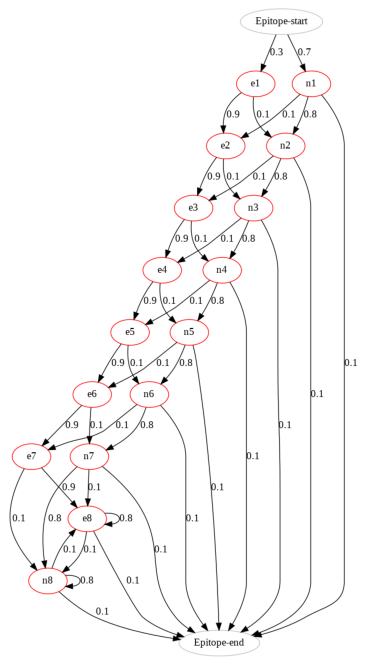

In [180]:
plt.figure(figsize=(12,12))

model.plot()

## Creating training and testing dataset

In [181]:
from sklearn.utils import shuffle

#Training

#Training set containing true exact epitopes
training_filted_list_exact = filted_list_exact[0:230]

#Training set containing non-epitopes
training_filted_list_non_epitope = filted_list_non_epitope[0:450]

#Combining training set containing true exact epitopes and non-epitopes
training =  training_filted_list_non_epitope + training_filted_list_exact
training_set_pg = [list(str(p)) for p in training]


#Testing

#Testing set containing true exact epitopes (40)
testing_filted_list_exact = filted_list_exact[231:271]

# Setting exact sequences to label 1
df_testing_filted_list_exact = pd.DataFrame(testing_filted_list_exact, columns = ['sequence']) 
df_testing_filted_list_exact['label'] = 1


#Testing set containing non-epitopes (120)
testing_filted_list_non_epitope = filted_list_non_epitope[451:571]
 
# Setting non-epitope to label 0
testing_filted_list_non_epitope = pd.DataFrame(testing_filted_list_non_epitope, columns = ['sequence']) 
testing_filted_list_non_epitope['label'] = 0

#Combining testing set containing true exact epitopes and non-epitopes

frames = [df_testing_filted_list_exact, testing_filted_list_non_epitope]

testing = pd.concat(frames)

testing = shuffle(testing)



In [182]:
#%%time 

# train the model using Baum-Welch

hmm_trained = model.fit(
    training_set_pg,
    algorithm = 'baum-welch',
    stop_threshold = stop_threshold,
    max_iterations = max_iterations,
    verbose = False,
    n_jobs = 4
)

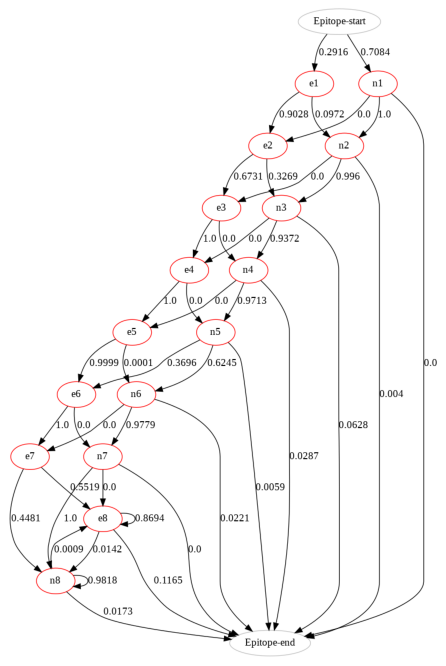

In [183]:
plt.figure(figsize=(12,12))

hmm_trained.plot()

## Compare the models on the test set

In [184]:
import pandas as pd

#QQIDPLDAEHSRGFV
#CVEEDMPEKVINDSQMTLRI
#IRRLINEESEEQKAV
#EVESGAAAAAAAAGQE
#CQPCPPGPPGP
#GGVFFEDGTRR
#WADDEWLKTVL
#QIEQQGSKNGK
#SMAAKKKKRNNMSRSRD
#AEEGSNGNVRE


sequences_containing_region = ['LLLLAITALEAGVVKRYNKRQQIDPLDAEHSRGFVCVEEDMPEKVINDSQMTLRI',
'GPDTNGSQFFICTECVEEDMPEKVINDSQMTLRILMDFDSRIKAYKFVSYAAVTFSTVA',
'GPPGPPGDAGPDGTPGQPGGVGAPGPVGPKGPPIRRLINEESEEQKAVQPGAPGVPGEKGICPKYCAIDGGVFFEDG',
'EKVLQAGFVPFGEIVSIEVESGAAAAAAAAGQEAAIDNMNDSELFGRTIRCN',
'YEGSHFHRIIPRFMVQGGDFTKGDGTGGKSIYGCQPCPPGPPGPFKLKHSMAGIVSMANCGPDTNGSQFFICTE',
'RQAYLLGGVFFEDGTRRLEVEDATRKLRLGDFMGNPDPAL',
'DASGKRLNTREIRKRQELEQLRHEKIQALLWADDEWLKTVLARCSNCGSDEHKT',
'NIVCTACGGAGHIAKDCKNPRQIEQQGSKNGKKPGLGSGSGGSGYKPKNYSLPSGTPI',
'GINSMAAKKKKRNNMSRSRDTDVPLYINAVFHESFIEVNEKGTEAAAASAVGIFLRSAPITLA',
'KSHSVPPEITGSSTPVCTTNVVFDGWEAEEGSNGNVREDEKITANYE']

df_sequences_containing_region = pd.DataFrame(columns = ['sequences_containing_region','sliced','position', 'probability', 'path'])

count=0;
for sequence_containing_region in sequences_containing_region:
  length_sequence_containing_region = len(sequence_containing_region)
  position=0;
  

  while position <= length_sequence_containing_region - 8:
    window = sequence_containing_region[position:position + 8]
    sliding_window = window
    window_likelihood = hmm_trained.log_probability(list(str(sliding_window)))
    logp, path = hmm_trained.viterbi(sliding_window)
    
    df_sequences_containing_region.loc[count] = [sequence_containing_region, window, position, window_likelihood, [state.name for idx, state in path]]
    position = position + 1;
    count = count + 1;


groupby_df_sequences_containing_region = df_sequences_containing_region.groupby(["sequences_containing_region"]).apply(lambda x: x).reset_index(drop=True)

groupby_df_sequences_containing_region['prediction'] = groupby_df_sequences_containing_region['path'].apply(lambda x: 1 if x[-2]=='e8' else 0)


prob_best_sliding_window = groupby_df_sequences_containing_region.groupby(["sequences_containing_region"]).head(1)


groupby_df_sequences_containing_region



,sequences_containing_region,sliced,position,probability,path,prediction
0,LLLLAITALEAGVVKRYNKRQQIDPLDAEHSRGFVCVEEDMPEKVI...,LLLLAITA,0,-25.068478,"[Epitope-start, e1, e2, e3, e4, e5, e6, e7, e8...",1
1,LLLLAITALEAGVVKRYNKRQQIDPLDAEHSRGFVCVEEDMPEKVI...,LLLAITAL,1,-25.435520,"[Epitope-start, e1, e2, e3, e4, e5, e6, e7, e8...",1
2,LLLLAITALEAGVVKRYNKRQQIDPLDAEHSRGFVCVEEDMPEKVI...,LLAITALE,2,-25.729973,"[Epitope-start, n1, n2, n3, n4, n5, e6, e7, e8...",1
3,LLLLAITALEAGVVKRYNKRQQIDPLDAEHSRGFVCVEEDMPEKVI...,LAITALEA,3,-25.561209,"[Epitope-start, n1, n2, n3, n4, n5, e6, e7, e8...",1
4,LLLLAITALEAGVVKRYNKRQQIDPLDAEHSRGFVCVEEDMPEKVI...,AITALEAG,4,-23.617619,"[Epitope-start, e1, e2, e3, e4, e5, e6, e7, e8...",1
...,...,...,...,...,...,...
504,KSHSVPPEITGSSTPVCTTNVVFDGWEAEEGSNGNVREDEKITANYE,VREDEKIT,35,-27.056256,"[Epitope-start, n1, n2, n3, n4, n5, n6, n7, n8...",0
505,KSHSVPPEITGSSTPVCTTNVVFDGWEAEEGSNGNVREDEKITANYE,REDEKITA,36,-24.481224,"[Epitope-start, n1, n2, n3, n4, n5, e6, e7, e8...",1
506,KSHSVPPEITGSSTPVCTTNVVFDGWEAEEGSNGNVREDEKITANYE,EDEKITAN,37,-25.961135,"[Epitope-start, n1, n2, n3, n4, n5, n6, n7, n8...",0
507,KSHSVPPEITGSSTPVCTTNVVFDGWEAEEGSNGNVREDEKITANYE,DEKITANY,38,-26.455536,"[Epitope-start, n1, n2, n3, n4, n5, n6, n7, n8...",0


In [185]:

preds = []

for index, row in testing.iterrows():
  
  logp, path = hmm_trained.viterbi(row['sequence'])
  last_state = [state.name for idx, state in path][-2]
  if last_state == 'e8':
    preds.append(1)
  else:
    preds.append(0)

y_test = testing['label']



In [186]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score

print("ROC_AUC:", roc_auc_score(y_test, preds))

print(classification_report(y_test, preds))

ROC_AUC: 0.7458333333333332
              precision    recall  f1-score   support

           0       0.87      0.92      0.89       120
           1       0.70      0.57      0.63        40

    accuracy                           0.83       160
   macro avg       0.78      0.75      0.76       160
weighted avg       0.82      0.83      0.83       160

